In [1]:

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [2]:
folder_path = "New_Data"
file_list = os.listdir(folder_path)
print("Files in the folder:", file_list)

Files in the folder: ['test', 'train', 'valid']


In [3]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator (rescale=1/255)
test_datagen = ImageDataGenerator (rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    'New_Data/train',
    classes = ['Burung Branjangan','Burung Jalak Bali','Burung Kenari','Burung Murai Batu','Burung Pentet'],
    target_size=(200, 200),
    batch_size=16)

validation_generator = validation_datagen.flow_from_directory(
    'New_Data/valid',
    classes = ['Burung Branjangan','Burung Jalak Bali','Burung Kenari','Burung Murai Batu','Burung Pentet'],
    target_size=(200, 200),
    batch_size=16,
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    'New_Data/test',
    classes = ['Burung Branjangan','Burung Jalak Bali','Burung Kenari','Burung Murai Batu','Burung Pentet'],
    target_size=(200, 200),
    batch_size=16,
    shuffle=False)


Found 1475 images belonging to 5 classes.
Found 437 images belonging to 5 classes.
Found 221 images belonging to 5 classes.


In [4]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

c:\Users\sayid\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,208,357 (8.42 MB)

 Trainable params: 2,208,357 (8.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

In [7]:
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode = 'min',
    patience= 3
)

In [8]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=75,
    steps_per_epoch=100,
    callbacks = [model_callback],
    verbose=1
)

Epoch 1/75


c:\Users\sayid\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 93/100 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.5466 - loss: 1.0414 - precision: 0.7998 - recall: 0.3778

c:\Users\sayid\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.5625 - loss: 1.0063 - precision: 0.8110 - recall: 0.3998 - val_accuracy: 0.9611 - val_loss: 0.1062 - val_precision: 0.9789 - val_recall: 0.9542
Epoch 2/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step - accuracy: 0.9800 - loss: 0.0659 - precision: 0.9833 - recall: 0.9761 - val_accuracy: 0.9657 - val_loss: 0.1442 - val_precision: 0.9679 - val_recall: 0.9657
Epoch 3/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.9901 - loss: 0.0304 - precision: 0.9912 - recall: 0.9901 - val_accuracy: 0.9771 - val_loss: 0.1428 - val_precision: 0.9771 - val_recall: 0.9771
Epoch 4/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.9911 - loss: 0.0274 - precision: 0.9914 - recall: 0.9896 - val_accuracy: 0.9794 - val_loss: 0.0878 - val_precision: 0.9793 - val_recall: 0.9748
Epoch 5/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.9874 - loss: 0.0382 - precision: 0.9894 - recall: 0.9852 - val_accuracy: 0.9840 - val_loss

In [9]:
model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9979 - loss: 0.0243 - precision: 0.9979 - recall: 0.9979


[0.05310935899615288,
 0.9954751133918762,
 0.9954751133918762,
 0.9954751133918762]

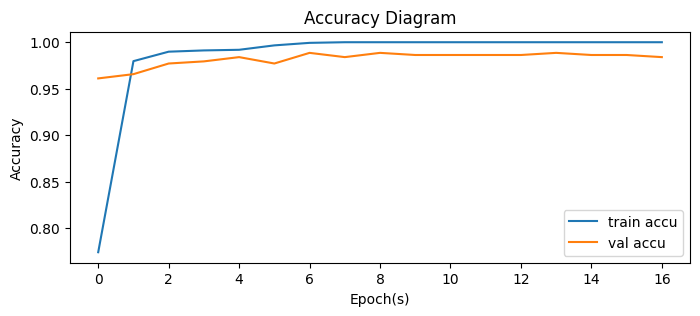

In [10]:
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])
plt.legend(['train accu', 'val accu'])
plt.title('Accuracy Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Accuracy')
plt.show()

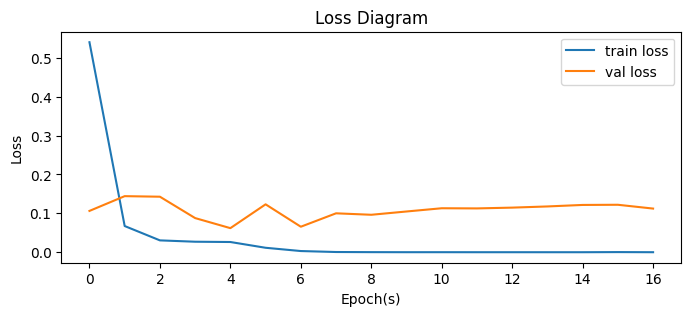

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


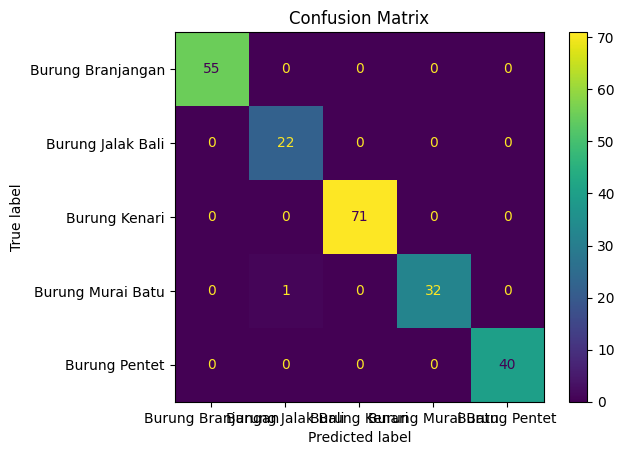

                   precision    recall  f1-score   support

Burung Branjangan       1.00      1.00      1.00        55
Burung Jalak Bali       0.96      1.00      0.98        22
    Burung Kenari       1.00      1.00      1.00        71
Burung Murai Batu       1.00      0.97      0.98        33
    Burung Pentet       1.00      1.00      1.00        40

         accuracy                           1.00       221
        macro avg       0.99      0.99      0.99       221
     weighted avg       1.00      1.00      1.00       221



In [12]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
cm = confusion_matrix(true_classes, predicted_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix')
plt.show()

report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

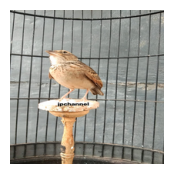

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Nama : Burung Branjangan


In [13]:
width = 200
height = 200
classes = ['Burung Branjangan', 'Burung Jalak Bali', 'Burung Kenari', 'Burung Murai Batu', 'Burung Pentet']

fileImage = Image.open("New_Data/valid/Burung Branjangan/yt-false-0240_jpg.rf.32311ec11a75d8e9ce82d4adf2636b81.jpg").convert("RGB").resize([width, height], Image.LANCZOS)
image = np.array(fileImage)
myimage = image.reshape(1, width, height, 3)

plt.figure(figsize=(4, 2))
plt.imshow(image)
plt.axis('off')  
plt.show()

my_predicted_image = model.predict(myimage)
y_class = np.argmax(my_predicted_image)
print(f"Nama : {classes[y_class]}")

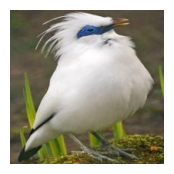

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Nama : Burung Jalak Bali


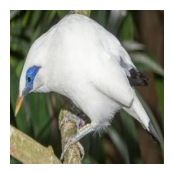

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Nama : Burung Jalak Bali


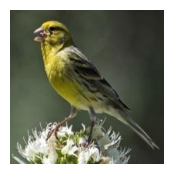

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Nama : Burung Kenari


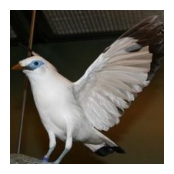

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Nama : Burung Jalak Bali


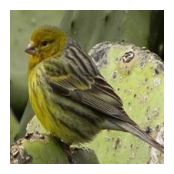

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Nama : Burung Kenari


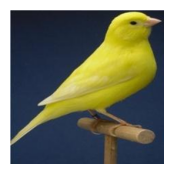

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Nama : Burung Kenari


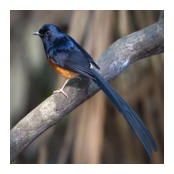

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Nama : Burung Jalak Bali


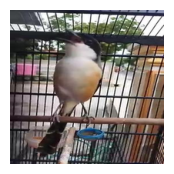

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Nama : Burung Pentet


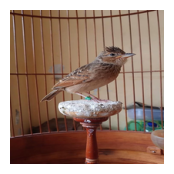

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Nama : Burung Branjangan


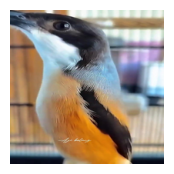

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nama : Burung Pentet


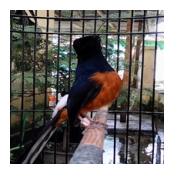

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Nama : Burung Murai Batu


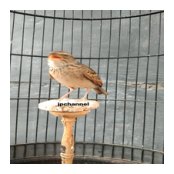

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Nama : Burung Branjangan


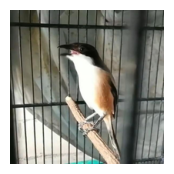

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Nama : Burung Pentet


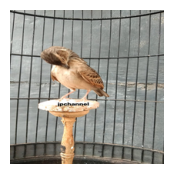

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Nama : Burung Branjangan


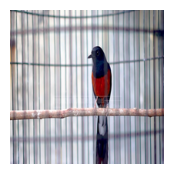

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Nama : Burung Murai Batu


In [14]:
def deteksi(path):
    fileImage = Image.open(path).convert("RGB").resize([width, height], Image.LANCZOS)
    image = np.array(fileImage)
    myimage = image.reshape(1, width, height, 3)
    plt.figure(figsize=(4, 2))
    plt.imshow(image)
    plt.axis('off')  
    plt.show()

    my_predicted_image = model.predict(myimage)
    y_class = np.argmax(my_predicted_image)
    print(f"Nama : {classes[y_class]}")

folder_path = "deteksi"
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
for file_name in file_names:
    path = f'{folder_path}/{file_name}'
    deteksi(path)

In [29]:
#Save Model
model.save('model_dt_kulit.h5')